In [1]:
using Pkg
Pkg.activate("../")

using Revise
using HiddenMarkovModel

 Activating environment at `/mnt/matylda3/ikocour/HiddenMarkovModel/Project.toml`
┌ Info: Precompiling HiddenMarkovModel [7212e43c-49b6-4278-a2e6-573e0ac5bb2d]
└ @ Base loading.jl:1260
┌ Warning: Replacing docs for `HiddenMarkovModel.pdfindex :: Union{}` in module `HiddenMarkovModel`
└ @ Base.Docs docs/Docs.jl:229
┌ Warning: Package HiddenMarkovModel does not have Printf in its dependencies:
│ - If you have HiddenMarkovModel checked out for development and have
│   added Printf as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with HiddenMarkovModel
└ Loading Printf into HiddenMarkovModel from project dependency, future warnings for HiddenMarkovModel are suppressed.
ERROR: LoadError: UndefVarError: State not defined
Stacktrace:
 [1] top-level scope at /mnt/matylda3/ikocour/HiddenMarkovModel/src/HiddenMarkovModel.jl:258
 [2] include(::Module, ::String) at ./Base.jl:377
 [3] top-level scope

ErrorException: Failed to precompile HiddenMarkovModel [7212e43c-49b6-4278-a2e6-573e0ac5bb2d] to /mnt/matylda3/ikocour/.julia-1.4.2/compiled/v1.4/HiddenMarkovModel/02MLo_A66T0.ji.

In [57]:
import Base.Iterators: flatten
addcontext(wrds::AbstractVector{String}) = map(x -> ("$(x)_l", "$(x)_m", "$(x)_r"), wrds) |> flatten |> collect

addcontext (generic function with 2 methods)

### Ex.1 - Sequence of single digitis

In [63]:
C,D,N =5, 2, 42
wrds = ["1", "2", "3", "4", "5", "6", "7", "8", "9", "o", "z"]
X = randn(D,N) # TODO replace by real data

emissionsmap = wrds |> addcontext |> x -> Dict((w, i) for (i, w) in enumerate(x));
pdfs = [GMM(C, X) for _ in 1:length(emissionsmap)];

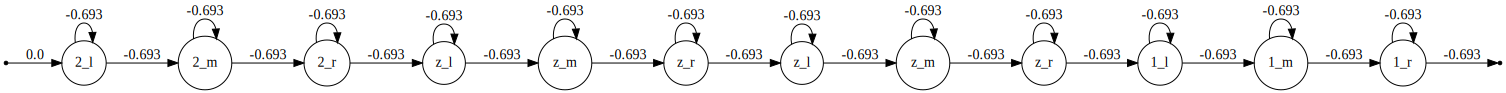

In [59]:
sequence = ["2", "z", "z", "1"]
g = sequence |> addcontext |> x -> LinearGraph(x, emissionsmap) |> addselfloop |> weightnormalize

In [1]:
llh = Dict{Int, Float32}()
for pdf in map(symbol -> emissionsmap[symbol], addcontext(collect(Set(sequence))))
    llh[pdf] = logpdf(pdfs[pdf], X)
end

UndefVarError: UndefVarError: sequence not defined

In [70]:
emissionsmap

Dict{String,Int64} with 33 entries:
  "6_r" => 18
  "9_l" => 25
  "5_m" => 14
  "2_l" => 4
  "3_l" => 7
  "1_l" => 1
  "3_r" => 9
  "o_m" => 29
  "8_r" => 24
  "2_m" => 5
  "4_m" => 11
  "4_l" => 10
  "9_m" => 26
  "z_l" => 31
  "z_m" => 32
  "7_r" => 21
  "3_m" => 8
  "6_l" => 16
  "7_m" => 20
  "6_m" => 17
  "4_r" => 12
  "2_r" => 6
  "1_r" => 3
  "1_m" => 2
  "9_r" => 27
  ⋮     => ⋮